# `Fall 2022 MGMT 59000-005`
## **Final Group Project - AUD Ones Out**
<br>
<div style="text-align: justify"> Craigslist offers users access to buy and sell online through free classified ads. When you access the website, it's important to protect your personal email from unscrupulous users who may spam you by offering fraudulent payments for your item. </div> 

### Purpose of this Notebook:
* Collect URLs to be accessed for Craigslist
* Extract high level attributes like Title, Description, Product Link

<br>

### Version History:
| Author | Description | Execution Duration (mins) |
| --- | --- | --- |
| Sanchit Agarwal | Text Analytics and Spam Detection| 15 |


In [69]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE
from time import time
from collections import Counter

In [56]:
data = pd.read_excel("/Users/sanchitagarwal/Desktop/chicagotrain.xlsx")
data.dropna(inplace=True)
data

,title,link,description,label
0,ASUS Onhub By Google Wifi Router,https://chicago.craigslist.org/wcl/ele/d/darie...,y Google Wifi Router - electronics - west chic...,Non-Spam
1,"Mitsubishi 46"" LCD TV Diamond Vision",https://chicago.craigslist.org/nwc/ele/d/naper...,"6"" LCD TV Diamond Vision - electronics - north...",Spam
2,Electronics having issues and for repairs/parts,https://chicago.craigslist.org/nwc/ele/d/addis...,having issues and for repairs/parts - electron...,Non-Spam
3,Brand New Selfie Ring light/Cell phone mount w...,https://chicago.craigslist.org/nwc/ele/d/addis...,lfie Ring light/Cell phone mount with Tripod S...,Spam
4,21 inch Non Smart TV,https://chicago.craigslist.org/chc/ele/d/chica...,Smart TV - electronics - city of chicago for s...,Non-Spam
...,...,...,...,...
2995,"Vizio 26‚Äù 1080p HDTV with Remote, Like New.",https://chicago.craigslist.org/nwc/ele/d/fox-l...,ys Zoom and conference all terminator - electr...,Non-Spam
2996,Garmin Nuvi 205w GPS in Box with Paperwork & A...,https://chicago.craigslist.org/nch/ele/d/fox-l...,Cordless Answering System - electronics - nor...,Non-Spam
2997,Desktop Calculator by Sharp,https://chicago.craigslist.org/nwc/ele/d/huntl...,s smart tv - electronics - city of chicago for...,Non-Spam
2998,Henry Tempo One ham radio power supply,https://chicago.craigslist.org/nwi/ele/d/valpa...,Mesh Range Extender EX7000 - electronics - -....,Non-Spam


In [59]:
data = data.drop('link', axis=1)
data.title = data.title.astype(str)
data.description = data.description.astype(str)
data.label = data.label.astype(str)
data["text"] = data["title"] + " " + data["description"]
data.head()

,title,description,label,text
0,ASUS Onhub By Google Wifi Router,y Google Wifi Router - electronics - west chic...,Non-Spam,ASUS Onhub By Google Wifi Router y Google Wifi...
1,"Mitsubishi 46"" LCD TV Diamond Vision","6"" LCD TV Diamond Vision - electronics - north...",Spam,"Mitsubishi 46"" LCD TV Diamond Vision 6"" LCD TV..."
2,Electronics having issues and for repairs/parts,having issues and for repairs/parts - electron...,Non-Spam,Electronics having issues and for repairs/part...
3,Brand New Selfie Ring light/Cell phone mount w...,lfie Ring light/Cell phone mount with Tripod S...,Spam,Brand New Selfie Ring light/Cell phone mount w...
4,21 inch Non Smart TV,Smart TV - electronics - city of chicago for s...,Non-Spam,21 inch Non Smart TV Smart TV - electronics - ...


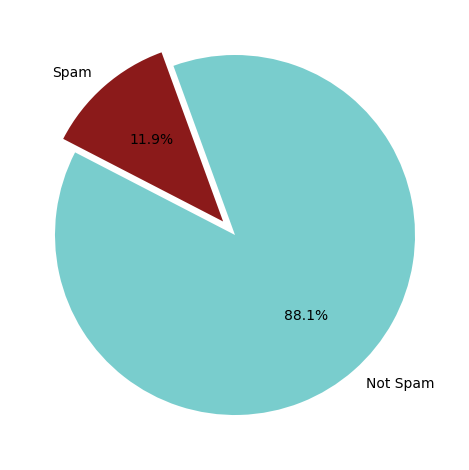

In [63]:
def piechart(j):
    cnt = 0
    for i in j:
        if i == 'Spam':
            cnt += 1
        else:
            pass
    cnt2 = len(j) - cnt
    fig_data = [cnt, cnt2]
    fig_label = ["Spam", "Not Spam"]
    fig_explode = [0.1, 0]
    fig_color = ['#8B1A1A','#79CDCD']
    fig1, ax1 = plt.subplots()
    ax1.pie(fig_data, labels=fig_label, colors=fig_color,  explode=fig_explode, autopct='%1.1f%%', startangle=110)
    plt.tight_layout()
    plt.show()
lbl = data.label.tolist()
piechart(lbl) 

## We can see here the data is highly imbalanced

In [68]:
## Text Pre-processing steps

lemmatizer = WordNetLemmatizer()
def prep(row):
    document = row["text"]
    document = document.lower()
    words = nltk.word_tokenize(document)
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords.words("english")]
    sentence = " ".join(words)
    return sentence



textList = [text for text in input_data.text]
proc_texts = [preprocess(text) for text in textList]
df_txts = pd.DataFrame({'label': label, 'text': proc_texts})
label = input_data.label.tolist()
df_txts

,label,text
0,Non-Spam,asus onhub google wifi router google wifi rout...
1,Spam,mitsubishi lcd tv diamond vision lcd tv diamon...
2,Non-Spam,electronics issue issue electronics chicago no...
3,Spam,brand new selfie ring phone mount tripod stand...
4,Non-Spam,inch non smart tv smart tv electronics city ch...
...,...,...
2956,Non-Spam,vizio hdtv remote like new zoom conference ter...
2957,Non-Spam,garmin nuvi gps box paperwork accessory cordle...
2958,Non-Spam,desktop calculator sharp smart tv electronics ...
2959,Non-Spam,henry tempo one ham radio power supply mesh ra...


In [72]:
df_txts['label'] = df_txts['label'].map({'Spam': 1, 'Non-Spam': 0})
df_txts['label'].value_counts()

0.0    2609
1.0     351
Name: label, dtype: int64

In [75]:
df_txts = df_txts[df_txts["label"]!="v"]
df_txts = df_txts.dropna()
df_txts.shape

(2960, 2)

In [94]:
###### splitting train test data ######
train_x, test_x, train_y, test_y = train_test_split(df_texts.text, df_texts.label, test_size=0.2, random_state=0,stratify=df_texts.label.values)

# TF- IDF Vectorisation transformation into training and test sets

def tk(doc):
    return doc
vec = TfidfVectorizer(analyzer='word', tokenizer=tk, preprocessor=tk, token_pattern=None,
                      min_df=2, ngram_range=(1,2), stop_words='english')
vec.fit(train_x)
train_x = vec.transform(train_x)
test_x = vec.transform(test_x)

#smt = SMOTE(sampling_strategy=0.25)
#train_x,train_y = smt.fit_resample(train_x,train_y)

/Users/sanchitagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


In [ ]:
## Training Begins 

In [95]:
# Naive Bayes

model = []
from sklearn.naive_bayes import BernoulliNB
NBmodel = BernoulliNB()
NBmodel.fit(train_x, train_y)
y_pred_NB = NBmodel.predict(test_x)
model.append("Naive Bayes")
print("Naive Bayes-")
print(classification_report(test_y, y_pred_NB))

Naive Bayes-
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       522
         1.0       0.31      0.37      0.34        70

    accuracy                           0.83       592
   macro avg       0.61      0.63      0.62       592
weighted avg       0.84      0.83      0.83       592



In [96]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=40, max_depth=4, bootstrap=True, random_state=0,class_weight={0:1,1:8})  
RFmodel.fit(train_x, train_y)
y_pred_RF = RFmodel.predict(test_x)
print("Random Forest-")
print(classification_report(test_y, y_pred_RF))


Random Forest-
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91       522
         1.0       0.43      0.87      0.57        70

    accuracy                           0.85       592
   macro avg       0.70      0.86      0.74       592
weighted avg       0.91      0.85      0.87       592



In [98]:
#Linear SVM

from sklearn.svm import LinearSVC
SVMmodel = LinearSVC(random_state = 0, penalty = 'l1', dual = False)
SVMmodel.fit(train_x, train_y)
y_pred_SVM = SVMmodel.predict(test_x)
model.append("SVM")
print("SVM-")
print(classification_report(test_y, y_pred_SVM))

SVM-
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       522
         1.0       1.00      0.07      0.13        70

    accuracy                           0.89       592
   macro avg       0.94      0.54      0.54       592
weighted avg       0.90      0.89      0.85       592



/Users/sanchitagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [99]:
#Polynomial SVM

from sklearn.svm import SVC 
SVMPmodel = SVC(kernel = 'poly',degree=3, random_state = 0, class_weight = 'balanced', gamma="auto")
SVMPmodel.fit(train_x, train_y)
y_pred_SVMP = SVMPmodel.predict(test_x)
model.append("Polynomial SVM")
print("SVMP:::")
print(classification_report(test_y, y_pred_SVMP))

SVMP:::
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       522
         1.0       0.12      1.00      0.21        70

    accuracy                           0.12       592
   macro avg       0.06      0.50      0.11       592
weighted avg       0.01      0.12      0.03       592



/Users/sanchitagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanchitagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanchitagarwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [100]:
# XG Boost model

from xgboost import XGBClassifier
clf = XGBClassifier(max_depth=5, n_estimators=100, scale_pos_weight=0.97, learning_rate=0.001)

In [102]:
clf.fit(train_x, train_y)
y_pred_clf = clf.predict(test_x)
model.append("XGBoost")
print("XGB-")
print(classification_report(test_y, y_pred_clf))

XGB-
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       522
         1.0       0.73      0.23      0.35        70

    accuracy                           0.90       592
   macro avg       0.82      0.61      0.65       592
weighted avg       0.88      0.90      0.87       592



In [103]:
def confusio_matrix(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    
    return cm

In [104]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [105]:
print(confusio_matrix(test_y, y_pred_clf))

[[516   6]
 [ 54  16]]


In [106]:
print(confusio_matrix(test_y, y_pred_RF)) ## Random Forest correctly classifies 1s. Lower false negatives

[[440  82]
 [  9  61]]


In [109]:
from sklearn.metrics import precision_score
acc = []
acc_NB = precision_score(test_y, y_pred_NB, pos_label=1 )  
print("Naive Bayes model Precision:: {:.2f}%".format(acc_NB*100))
acc.append(acc_NB*100)
acc_RF = precision_score(test_y, y_pred_RF, pos_label=1) 
print("Random Forest Model Precision:: {:.2f}%".format(acc_RF*100))
acc.append(acc_RF*100)
acc_SVM = precision_score(test_y, y_pred_SVM, pos_label=1) 
print("SVM model Precision:: {:.2f}%".format(acc_SVM*100))
acc.append(acc_SVM*100)
acc_SVMP = precision_score(test_y, y_pred_SVMP, pos_label=1)  
print("SVMP model Precision:: {:.2f}%".format(acc_SVM*100))
acc.append(acc_SVMP*100)
acc_XGB = precision_score(test_y, y_pred_clf, pos_label=1)
print("XGB model Precision:: {:.2f}%".format(acc_XGB*100))
acc.append(acc_XGB*100)

Naive Bayes model Precision:: 30.95%
Random Forest Model Precision:: 42.66%
SVM model Precision:: 100.00%
SVMP model Precision:: 100.00%
XGB model Precision:: 72.73%


In [111]:
from sklearn.metrics import recall_score
rec = []
acc_NB = recall_score(test_y, y_pred_NB, pos_label=1 )  
print("Naive Bayes model Recall:: {:.2f}%".format(acc_NB*100))
rec.append(acc_NB*100)
acc_RF = recall_score(test_y, y_pred_RF, pos_label=1) 
print("Random Forest Model Recall:: {:.2f}%".format(acc_RF*100))
rec.append(acc_RF*100)
acc_SVM = recall_score(test_y, y_pred_SVM, pos_label=1) 
print("SVM model Recall:: {:.2f}%".format(acc_SVM*100))
rec.append(acc_SVM*100)
acc_SVMP = recall_score(test_y, y_pred_SVMP, pos_label=1)  
print("SVMP model Recall:: {:.2f}%".format(acc_SVM*100))
rec.append(acc_SVMP*100)
acc_XGB = recall_score(test_y, y_pred_clf, pos_label=1)
print("XGB model Recall:: {:.2f}%".format(acc_XGB*100))
rec.append(acc_XGB*100)

## RF has the best recall among all models

Naive Bayes model Recall:: 37.14%
Random Forest Model Recall:: 87.14%
SVM model Recall:: 7.14%
SVMP model Recall:: 7.14%
XGB model Recall:: 22.86%
